In [73]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# Load and preprocess the data
data = pd.read_csv('all_potholes.csv')

# Handle NaN values
data['Bags used '] = data['Bags used '].fillna(data['Bags used '].median())
data = data.dropna()

# Calculate Z-scores
data['z_score_area'] = stats.zscore(data['pothole_area_mm2'])
data['z_score_bags'] = stats.zscore(data['Bags used '])

data.to_csv('z_score.csv', index=False)


In [87]:
# Define Z-score threshold for outliers
z_threshold = 3

# Identify outliers
outliers = data[data['z_score_area'].abs() > z_threshold]
non_outliers = data[data['z_score_area'].abs() <= z_threshold]

print(outliers)

# Calculate the correlation coefficient for outliers
correlation_outliers = outliers[['pothole_area_mm2', 'Bags used ']].corr().loc['pothole_area_mm2', 'Bags used ']
print(f"Correlation between 'pothole_area_mm2' and 'Bags used' for outliers: {correlation_outliers}")


      pothole_id  aspect_ratio  pothole_area_mm2  Bags used   z_score_area  \
10           983      0.868421          722304.0        1.00      6.586919   
174         1611      1.595190          397204.0        2.00      3.350560   
181         1609      1.332268          522084.0        0.50      4.593736   
235         1653      1.505017          538200.0        1.50      4.754170   
261          349      1.357377          505080.0        3.00      4.424462   
299         1654      0.960876          392346.0        0.50      3.302199   
332         1022      1.616466          400890.0        2.00      3.387254   
403          982      0.947651          525970.0        2.00      4.632421   
470          986      1.386364          386496.0        1.00      3.243962   
472          165      0.840537          378444.0        1.00      3.163805   
473          165      0.840537          378444.0        1.00      3.163805   
514          979      0.859259          563760.0        1.00    

In [90]:
# Prepare data for non-outliers
X_non_outliers = non_outliers[['pothole_area_mm2', 'aspect_ratio']]
y_non_outliers = non_outliers['Bags used ']
X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_non_outliers, y_non_outliers, test_size=0.2)

# Train and evaluate the non-outlier model
model_non_outliers = RandomForestRegressor(random_state=42)
model_non_outliers.fit(X_train_non, y_train_non)
non_outlier_predictions = model_non_outliers.predict(X_test_non)

mae_non = mean_absolute_error(y_test_non, non_outlier_predictions)
mse_non = mean_squared_error(y_test_non, non_outlier_predictions)
r2_non = r2_score(y_test_non, non_outlier_predictions)

print("Random Forest Regressor Non Outlier Performance:")
print(f"Mean Absolute Error: {mae_non}")
print(f"Mean Squared Error: {mse_non}")
print(f"R² Score: {r2_non}")


Random Forest Regressor Non Outlier Performance:
Mean Absolute Error: 0.561969657645667
Mean Squared Error: 0.8663061151493863
R² Score: 0.357354025287168


Correlation between 'pothole_area_mm2' and 'Bags used' for non outliers: 0.05316866533275612


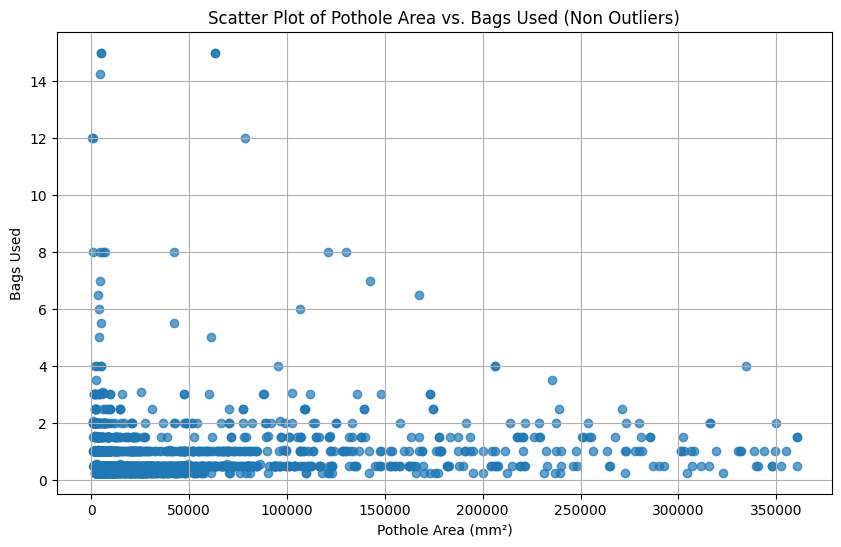

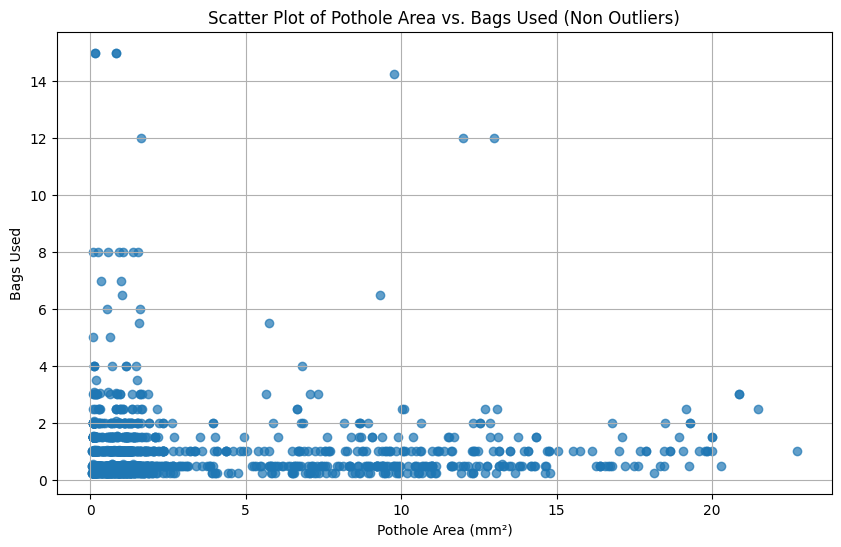

In [92]:
import matplotlib.pyplot as plt
# Calculate the correlation coefficient for non outliers
correlation_non_outliers = non_outliers[['pothole_area_mm2', 'Bags used ']].corr().loc['pothole_area_mm2', 'Bags used ']
print(f"Correlation between 'pothole_area_mm2' and 'Bags used' for non outliers: {correlation_non_outliers}")

# Scatter plot for outliers
plt.figure(figsize=(10, 6))
plt.scatter(non_outliers['pothole_area_mm2'], non_outliers['Bags used '], alpha=0.7)
plt.title('Scatter Plot of Pothole Area vs. Bags Used (Non Outliers)')
plt.xlabel('Pothole Area (mm²)')
plt.ylabel('Bags Used')
plt.grid(True)
plt.show()

# Scatter plot for outliers
plt.figure(figsize=(10, 6))
plt.scatter(non_outliers['aspect_ratio'], non_outliers['Bags used '], alpha=0.7)
plt.title('Scatter Plot of Pothole Area vs. Bags Used (Non Outliers)')
plt.xlabel('Pothole Area (mm²)')
plt.ylabel('Bags Used')
plt.grid(True)
plt.show()

In [135]:
# Prepare data for non-outliers
X_non_outliers = non_outliers[['pothole_area_mm2', 'aspect_ratio']]
y_non_outliers = non_outliers['Bags used ']

X_train_non, X_test_non, y_train_non, y_test_non = train_test_split(X_non_outliers, y_non_outliers, test_size=0.2)

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate each model
for name, model_non_outliers in models.items():
    model_non_outliers.fit(X_train_non, y_train_non)
    non_outlier_predictions = model_non_outliers.predict(X_test_non)

    mae_non = mean_absolute_error(y_test_non, non_outlier_predictions)
    mse_non = mean_squared_error(y_test_non, non_outlier_predictions)
    r2_non = r2_score(y_test_non, non_outlier_predictions)
    
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae_non}")
    print(f"Mean Squared Error: {mse_non}")
    print(f"R² Score: {r2_non}\n")

Linear Regression Performance:
Mean Absolute Error: 0.5946190612042039
Mean Squared Error: 0.7815413769123152
R² Score: 0.01353141519847767

SVR Performance:
Mean Absolute Error: 0.5404471365827727
Mean Squared Error: 0.8512742437432508
R² Score: -0.07448603914109442

Gradient Boosting Performance:
Mean Absolute Error: 0.637542954043752
Mean Squared Error: 1.0539830492357203
R² Score: -0.3303469242947137

Random Forest Performance:
Mean Absolute Error: 0.595843247806369
Mean Squared Error: 0.9684300550527873
R² Score: -0.22236116232444347



In [119]:
# Prepare features and target for outliers
X_outliers = outliers[['pothole_area_mm2', 'aspect_ratio']]
y_outliers = outliers['Bags used ']

# Split into training and test sets
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outliers, y_outliers, test_size=0.2)

model_outliers = GradientBoostingRegressor()

# Train and evaluate each model
model_outliers.fit(X_train_out, y_train_out)
predictions = model_outliers.predict(X_test_out)

mae = mean_absolute_error(y_test_out, predictions)
mse = mean_squared_error(y_test_out, predictions)
r2 = r2_score(y_test_out, predictions)

print(f"{name} Performance:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}\n")

Random Forest Performance:
Mean Absolute Error: 0.8252582671642741
Mean Squared Error: 1.4112040485468684
R² Score: -10.653814078322526



In [107]:
# Load and preprocess the test data
test_data = pd.read_csv('their_test.csv')
test_data['pothole_area_cm2'] = test_data['pothole_area_mm2'] / 1000

# Calculate Z-scores based on non-outliers' statistics
mean_area = non_outliers['pothole_area_mm2'].mean()
std_area = non_outliers['pothole_area_mm2'].std()
test_data['z_score_area'] = (test_data['pothole_area_mm2'] - mean_area) / std_area

# Predict 'Bags used' for test data
def predict_for_test_data(row):
    if abs(row['z_score_area']) > z_threshold:
        return model_outliers.predict([[row['pothole_area_mm2'], row['pothole_area_cm2']]])[0]
    else:
        return model_non_outliers.predict([[row['pothole_area_mm2'], row['pothole_area_cm2']]])[0]

test_data['Bags used'] = test_data.apply(predict_for_test_data, axis=1)
test_data['Pothole number'] = test_data['pothole_id']
test_data = test_data[['Pothole number', 'Bags used']]

# Save and display predictions
test_data.to_csv('their_test_predictions.csv', index=False)
print("Predictions saved to 'their_test_predictions.csv'")

Predictions saved to 'their_test_predictions.csv'


/Users/daneladendorff/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/daneladendorff/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/daneladendorff/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/daneladendorff/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/daneladendorff/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have vali